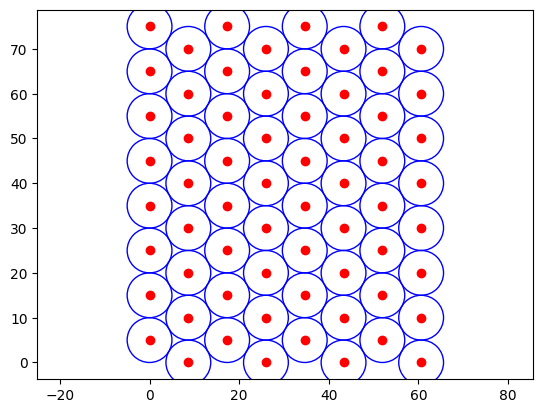

In [1]:
import time
from typing import List, Tuple

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy as sp
import scipy.optimize
import scipy.sparse
from networkx.drawing.layout import _process_params
from tqdm.auto import tqdm

from src.python.cost import calcCost
from src.python.vis.visGraph import visGraph

# def hexagon(n: int, k: float) -> np.ndarray:
#     # https://www.redblobgames.com/grids/hexagons/
#     ret = [(0, 0)]
#     if n == 1:
#         return np.array(ret)
#     diffs = [(0, k, -k), (-k, k, 0), (-k, 0, k), (0, -k, k), (k, -k, 0), (k, 0, -k)]
#     level = 0
#     while True:
#         q, r, s = k * level, -k * level, 0
#         for i in range(6):
#             for _ in range(level):
#                 ret.append(np.array([(q + r / 2), r * (3**0.5) / 2]))
#                 if len(ret) == n:
#                     return np.array(ret)
#                 q, r, s = q + diffs[i][0], r + diffs[i][1], s + diffs[i][2]
#         level += 1


def hexagon(n: int, k: float) -> np.ndarray:
    # https://www.redblobgames.com/grids/hexagons/
    sqrtN = int(np.sqrt(n))
    ret = []
    invSqrt3 = 1 / pow(3, 0.5)
    for q in range(sqrtN + 2):
        for r in range(sqrtN):
            x = 1.5 * invSqrt3 * q * k
            if q % 2:
                y = r * k
            else:
                y = (r + 0.5) * k
            ret.append((x, y))
            if len(ret) == n:
                return np.array(ret)


def drawHexagon(n: int, k: float):
    hexagonList = hexagon(n, k)
    for i in hexagonList:
        plt.plot(i[0], i[1], "ro")
        circle = plt.Circle(i, k / 2, color="b", fill=False)
        plt.gca().add_artist(circle)
    plt.axis("equal")
    plt.show()


drawHexagon(64, 10)

532.2097553059644


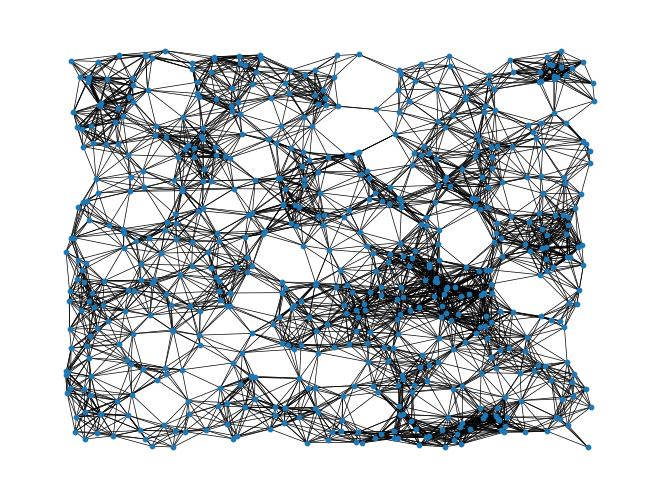

In [2]:
G = nx.random_geometric_graph(600, 0.1, seed=0)
dim = 2
G, center = _process_params(G, None, dim)

A = nx.to_scipy_sparse_array(G, dtype="f")
n = G.number_of_nodes()
k = 1 / np.sqrt(n)
A = scipy.sparse.coo_matrix(A)

pos = np.array([G.nodes[i]["pos"] for i in G.nodes])
print(calcCost(pos, A, k))

nx.draw(G, pos, node_size=10, width=0.5)
plt.show()

# res = sp.optimize.minimize(cost_fun, pos.ravel(), method="L-BFGS-B", jac=True)
# pos = res.x.reshape((n, dim))
# print(calcCost(pos, A, k))

# nx.draw(G, pos, node_size=10, width=0.5)
# plt.show()

9.839869400020689


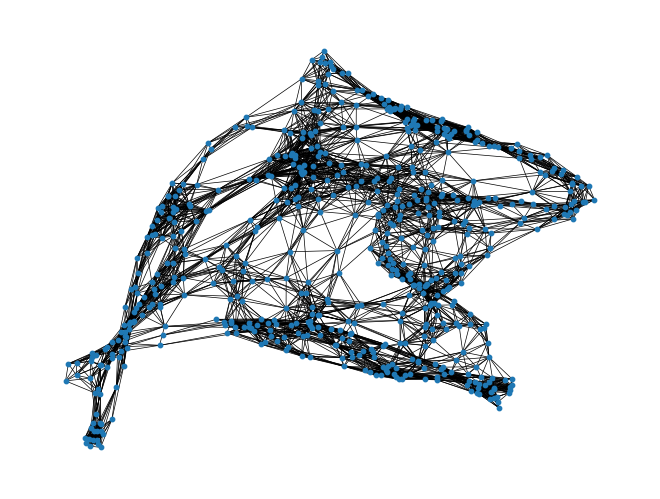

In [9]:
t0 = time.perf_counter()
pos = nx.spring_layout(G)
t1 = time.perf_counter()
print(t1 - t0)
nx.draw(G, pos, node_size=10, width=0.5)
plt.show()

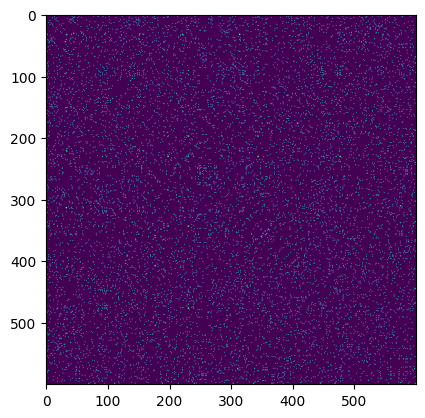

In [35]:
plt.imshow(A.todense())
plt.show()

In [16]:
pos = hexagon(n, k)
np.random.shuffle(pos)
# visGraph(G, pos)

t0 = time.perf_counter()
for _ in tqdm(range(1)):
    delta = pos[A.row] - pos[A.col]
    dist = np.linalg.norm(delta, axis=1)
    forces = (A.data * dist / k)[:, np.newaxis] * delta
    grad = np.zeros_like(pos)
    grad[A.row] -= forces
t1 = time.perf_counter()
print(f"{t1-t0=}")

# visGraph(G, pos)

  0%|          | 0/1 [00:00<?, ?it/s]

(600, 2)
t1-t0=0.01538210001308471
